In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [45]:

# Generate some sample data
np.random.seed(42)
time_periods = 5
Buddy_Sales = np.random.randint(1000000, 6523425, time_periods)
YNAB_Sales = np.random.randint(100, 1000000, time_periods)
GoodBudget_Sales = np.random.randint(100, 4000000, time_periods)
WeMoney_Sales = np.random.randint(100, 4000000, time_periods)
Empower_Sales = np.random.randint(250, 20000000, time_periods)
PocketSmith_Sales = np.random.randint(500, 1500000, time_periods)
Dolfin_Sales = np.random.randint(1000, 1000000, time_periods)

# Combine data into a list of tuples
data = list(zip(range(1, time_periods + 1), Buddy_Sales,YNAB_Sales,GoodBudget_Sales,WeMoney_Sales,Empower_Sales,PocketSmith_Sales,Dolfin_Sales))

# Define the file name
file_name = 'sales_data_research.csv'

# Write data to CSV file
with open(file_name, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write header
    csv_writer.writerow(['Time Period', 'Buddy Sales','YNAB Sales','GoodBudget Sales','WeMoney Sales','Empower Sales','PocketSmith Sales','Dolfin Sales'])

    # Write data rows
    csv_writer.writerows(data)

print(f'Data has been stored in {file_name}')

Data has been stored in sales_data_research.csv


In [46]:
# Create a DataFrame
data = pd.DataFrame({'Buddy_Sales':Buddy_Sales, 'YNAB_Sales':YNAB_Sales,'GoodBudget_Sales' :GoodBudget_Sales ,'WeMoney_Sales':WeMoney_Sales,'Empower_Sales':Empower_Sales,'PocketSmith_Sales':PocketSmith_Sales,'Dolfin_Sales':Dolfin_Sales})

In [47]:
# Assume a feature representing time periods
data['Time_Period'] = np.arange(1, time_periods + 1)

In [48]:
# Define the features (X) and the target variable (y)
X = data[['Time_Period']]
y = data[['Buddy_Sales','YNAB_Sales','GoodBudget_Sales','WeMoney_Sales','Empower_Sales','PocketSmith_Sales','Dolfin_Sales']]


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Create a linear regression model
model = LinearRegression()

In [51]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [52]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [53]:
# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4282224026446.167


In [54]:
# Assuming you have future time periods for prediction
future_time_periods = np.arange(time_periods + 1, time_periods + 2).reshape(-1, 1)


In [55]:
# Make predictions for future time periods
future_predictions = model.predict(future_time_periods)


C:\Users\awakw\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
# Calculate market share for each company in the future
future_market_share_Buddy = future_predictions[:, 0] / np.sum(future_predictions, axis=1)
future_market_share_YNAB = future_predictions[:, 1] / np.sum(future_predictions, axis=1)
future_market_share_GoodBudget = future_predictions[:, 2] / np.sum(future_predictions, axis=1)
future_market_share_WeMoney = future_predictions[:, 3] / np.sum(future_predictions, axis=1)
future_market_share_Empower = future_predictions[:, 4] / np.sum(future_predictions, axis=1)
future_market_share_Pocketsmith = future_predictions[:, 5] / np.sum(future_predictions, axis=1)
future_market_share_DolFin = future_predictions[:, 6] / np.sum(future_predictions, axis=1)


In [57]:
# Display future market share
for i in range(len(future_time_periods)):
    print(f'Time Period {future_time_periods[i][0]} - '
          f'Buddy Market Share: {future_market_share_Buddy[i]:.2%}, '
          f'YNAB Market Share: {future_market_share_YNAB[i]:.2%}, '
          f'GoodBudget Market Share: {future_market_share_GoodBudget[i]:.2%}, '
          f'WeMoney Market Share: {future_market_share_WeMoney[i]:.2%}, '
          f'Empower Market Share: {future_market_share_Empower[i]:.2%}, '
          f'Pocketsmith Market Share: {future_market_share_Pocketsmith[i]:.2%}, '
          f'DolFin Market Share: {future_market_share_DolFin[i]:.2%} ')

Time Period 6 - Buddy Market Share: 19.62%, YNAB Market Share: 1.73%, GoodBudget Market Share: 14.54%, WeMoney Market Share: 8.99%, Empower Market Share: 41.71%, Pocketsmith Market Share: 9.75%, DolFin Market Share: 3.67% 


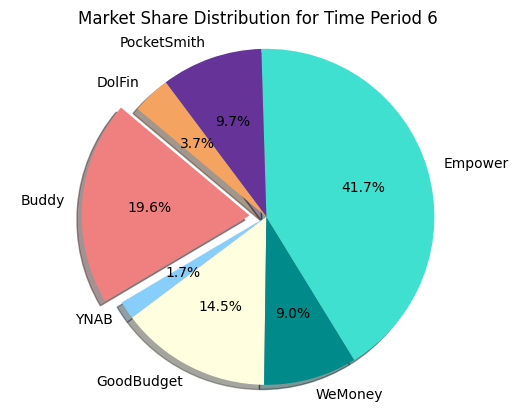

In [65]:
# Plot future market share over time
# Pie chart for the last time period
last_period_index = -1
labels = ['Buddy', 'YNAB', 'GoodBudget', 'WeMoney', 'Empower', 'PocketSmith', 'DolFin']  # Include 'DolFin'
sizes = [future_market_share_Buddy[last_period_index], future_market_share_YNAB[last_period_index],
         future_market_share_GoodBudget[last_period_index], future_market_share_WeMoney[last_period_index],
         future_market_share_Empower[last_period_index], future_market_share_Pocketsmith[last_period_index],
         future_market_share_DolFin[last_period_index]]
colors = ['lightcoral', 'lightskyblue', 'lightyellow', 'darkcyan', 'turquoise', 'rebeccapurple', 'sandybrown']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode the 1st slice (i.e., 'Buddy')


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Market Share Distribution for Time Period {future_time_periods[last_period_index][0]}')
plt.show()
